# 1 - Importing Libraries 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 2 - Loading Data  

In [16]:
column_names=['Tweet_ID','Entity','Sentiment','Tweet_content']

df_train = pd.read_csv("twitter_training.csv",
                    sep=',',names=column_names)


df_val = pd.read_csv("twitter_validation.csv",
                    sep=',',names=column_names)

In [18]:
df_train.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
df_val.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [10]:
# information of the dataset
print(f"Train dataset shape {df_train.shape}")
print(f"Validation dataset shape {df_val.shape}")

Train dataset shape (74682, 4)
Validation dataset shape (1000, 4)


In [11]:
# checking nan values 
print("\t\tTrain dataset")
print(df_train.isna().sum())
print("*"*40)
print("\n\n\t\tValidation dataset")
print(df_val.isna().sum())

		Train dataset
Tweet_ID           0
Entity             0
Sentiment          0
Tweet_content    686
dtype: int64
****************************************


		Validation dataset
Tweet_ID         0
Entity           0
Sentiment        0
Tweet_content    0
dtype: int64


In [12]:
# checking duplicated values
print("Train dataset")
print(df_train.duplicated().sum())
print("*"*40)
print("\nValidation dataset")
print(df_val.duplicated().sum())

Train dataset
2700
****************************************

Validation dataset
0


In [13]:
# remove dupicate and nan values
df_train.dropna(inplace=True)
df_train.drop_duplicates(inplace=True)

df_val.dropna(inplace=True)
df_val.drop_duplicates(inplace=True)

# 3 - EDA

In [14]:


# Assuming train and validation are your dataframes

# Create subplots: use 'domain' type for Pie charts
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# Train dataset pie chart
fig.add_trace(go.Pie(labels=df_train['Sentiment'].value_counts().index, 
                     values=df_train['Sentiment'].value_counts(), 
                     name="Train dataset"), 
              1, 1)

# Validation dataset pie chart
fig.add_trace(go.Pie(labels=df_val['Sentiment'].value_counts().index, 
                     values=df_val['Sentiment'].value_counts(), 
                     name="Validation dataset"), 
              1, 2)

# Update titles
fig.update_layout(
    title_text="Proportions of Target Classes",
    annotations=[dict(text='Train dataset', x=0.15, y=1.1, font_size=15, showarrow=False),
                 dict(text='Validation dataset', x=0.88, y=1.1, font_size=15, showarrow=False)]
)

# Show figure
fig.show()


In [15]:
import re

# Function to remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # other symbols
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Fill NaN values with an empty string
df_train['Tweet_content'] = df_train['Tweet_content'].fillna('')

# Remove URLs and emojis from the text
df_train['Cleaned_Text'] = df_train['Tweet_content'].apply(remove_urls).apply(remove_emojis)

# Create the Text_Length column based on the cleaned text
df_train['Text_Length'] = df_train['Cleaned_Text'].apply(len)

# Display the first few rows to verify the new column
print(df_train[['Tweet_content', 'Cleaned_Text', 'Text_Length']].head())


                                       Tweet_content  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                        Cleaned_Text  Text_Length  
0  im getting on borderlands and i will murder yo...           53  
1  I am coming to the borders and I will kill you...           51  
2  im getting on borderlands and i will kill you ...           50  
3  im coming on borderlands and i will murder you...           51  
4  im getting on borderlands 2 and i will murder ...           57  


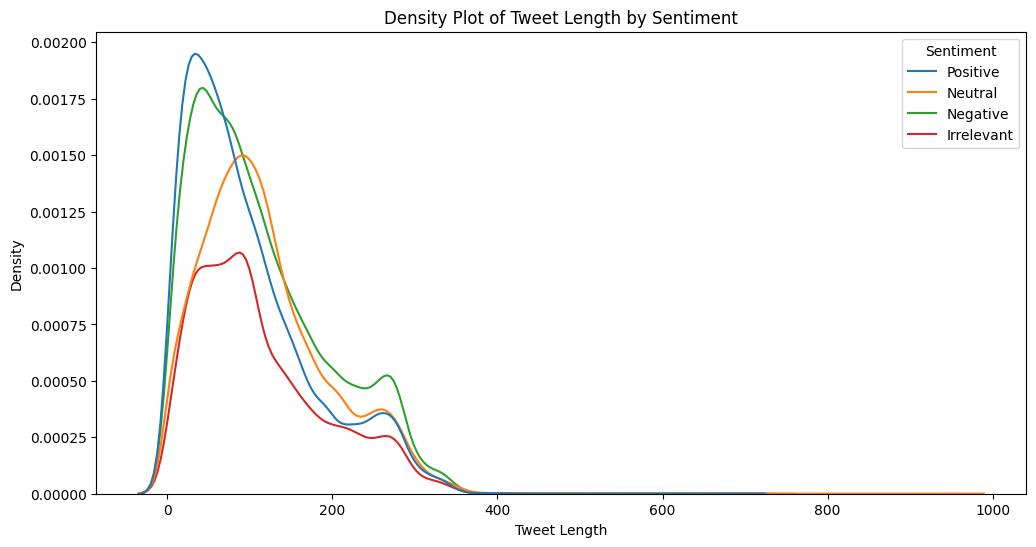

In [16]:


# Generate a density plot similar to the provided image
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_train, x='Text_Length', hue='Sentiment')
plt.title('Density Plot of Tweet Length by Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Density')
plt.show()


                                       Tweet_content  \
0  I mentioned on Facebook that I was struggling ...   
1  BBC News - Amazon boss Jeff Bezos rejects clai...   
2  @Microsoft Why do I pay for WORD when it funct...   
3  CSGO matchmaking is so full of closet hacking,...   
4  Now the President is slapping Americans in the...   

                                        Cleaned_Text  Text_Length  
0  I mentioned on Facebook that I was struggling ...          242  
1  BBC News - Amazon boss Jeff Bezos rejects clai...          109  
2  @Microsoft Why do I pay for WORD when it funct...           90  
3  CSGO matchmaking is so full of closet hacking,...           71  
4  Now the President is slapping Americans in the...          170  


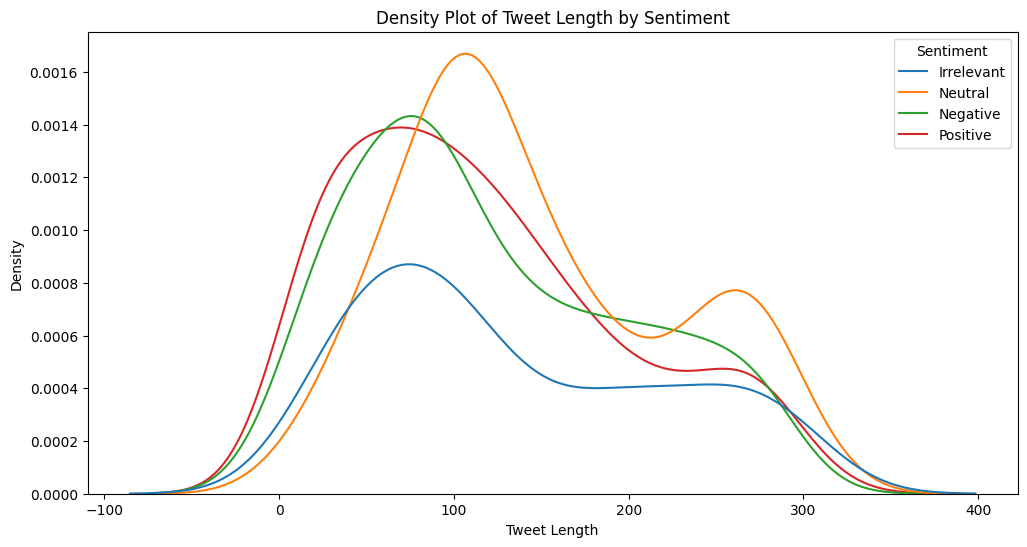

In [17]:

df_val['Tweet_content'] = df_val['Tweet_content'].fillna('')

# Remove URLs and emojis from the text
df_val['Cleaned_Text'] = df_val['Tweet_content'].apply(remove_urls).apply(remove_emojis)

# Create the Text_Length column based on the cleaned text
df_val['Text_Length'] = df_val['Cleaned_Text'].apply(len)

# Display the first few rows to verify the new column
print(df_val[['Tweet_content', 'Cleaned_Text', 'Text_Length']].head())



# Generate a density plot similar to the provided image
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_val, x='Text_Length', hue='Sentiment')
plt.title('Density Plot of Tweet Length by Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Density')
plt.show()


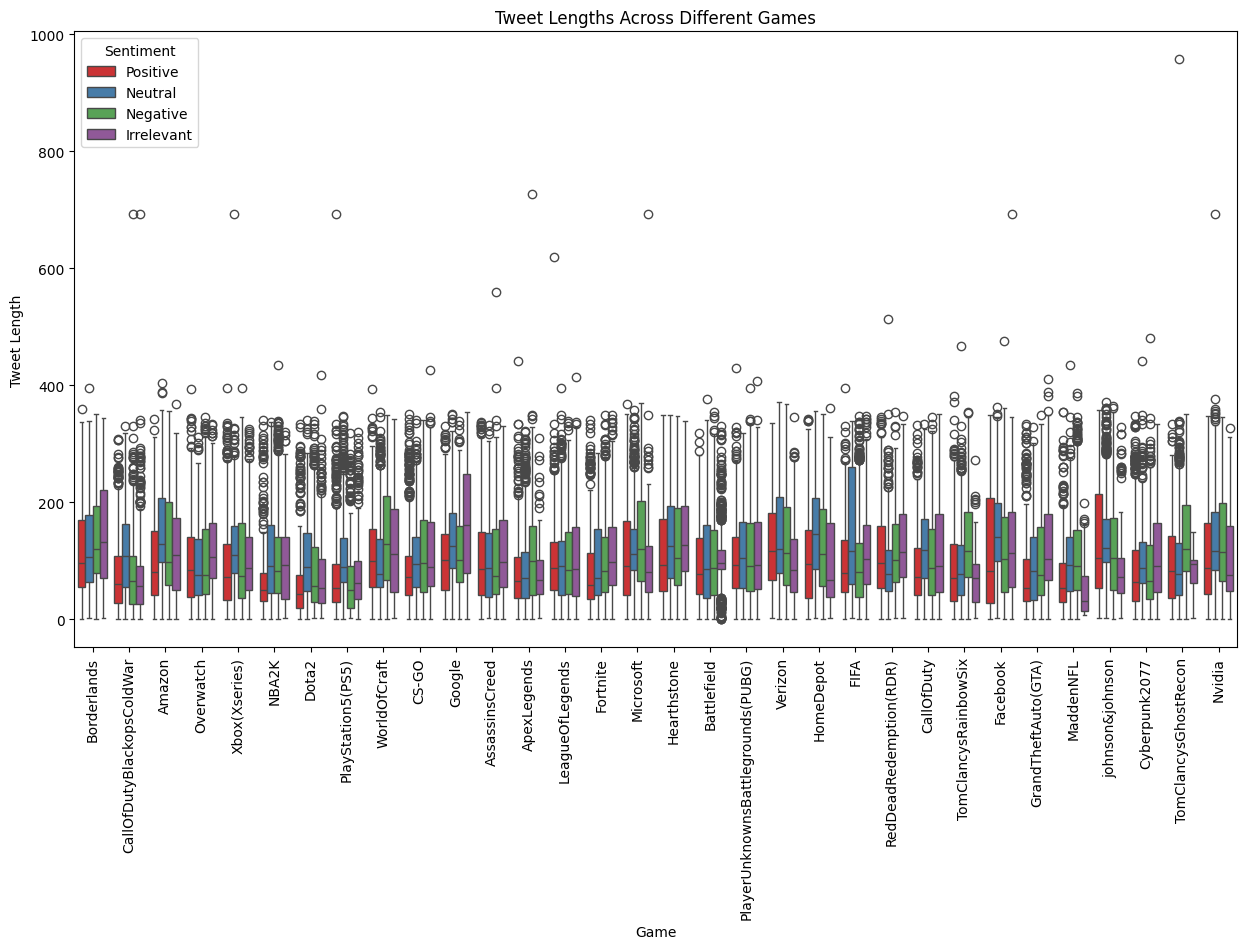

In [18]:



# Boxplot of tweet lengths across different games
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_train, x='Entity', y='Text_Length', hue='Sentiment', palette='Set1')
plt.title('Tweet Lengths Across Different Games')
plt.xlabel('Game')
plt.ylabel('Tweet Length')
plt.xticks(rotation=90)
plt.show()


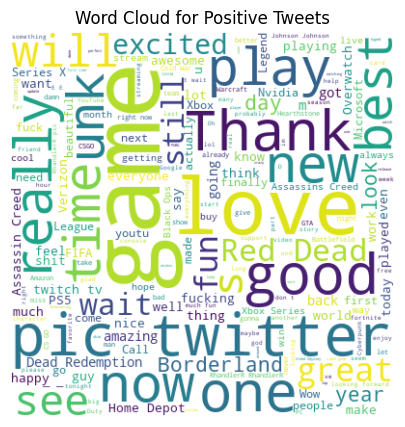

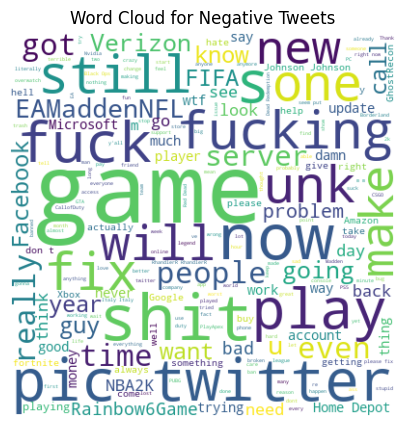

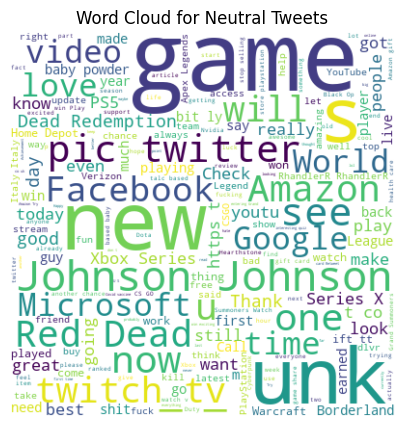

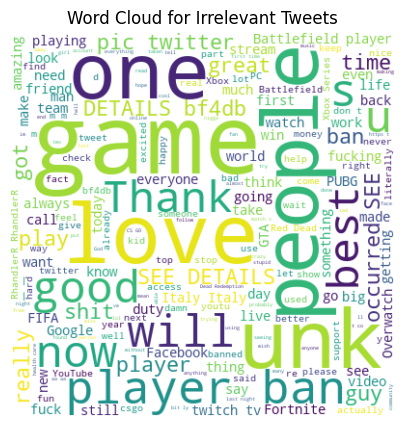

In [19]:


def generate_word_cloud(sentiment):
    # Filter the dataset to include only tweets with the specified sentiment
    tweets = df_train[df_train['Sentiment'] == sentiment]['Cleaned_Text']
    
    # Combine the text of all tweets with the specified sentiment
    text = ' '.join(tweets)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=400, height=400,max_font_size=100, background_color='white').generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Tweets')
    plt.axis('off')
    plt.show()

# Generate word clouds for Negative, Neutral, and Irrelevant sentiments
generate_word_cloud('Positive')
generate_word_cloud('Negative')
generate_word_cloud('Neutral')
generate_word_cloud('Irrelevant')


# 4 - Data Processing 

In [20]:
import pandas as pd

# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to remove outliers in the Text_Length column
df_cleaned = remove_outliers(df_train, 'Text_Length')

# Display the number of rows before and after removing outliers
print(f'Number of rows before removing outliers: {len(df_train)}')
print(f'Number of rows after removing outliers: {len(df_cleaned)}')

# save the cleaned dataset to a new CSV file
df_cleaned.to_csv('cleaned_twitter_training.csv', index=False)


Number of rows before removing outliers: 71656
Number of rows after removing outliers: 70871


In [21]:
# Tokenazation and Lemmatization

import spacy
import pandas as pd

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Function to perform tokenization and lemmatization using spaCy
def tokenize_and_lemmatize(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_tokens)

# Apply the function to the Cleaned_Text column
df_train['Processed_Text'] = df_train['Cleaned_Text'].apply(tokenize_and_lemmatize)

# Display the first few rows to verify the new column
print(df_train[['Cleaned_Text', 'Processed_Text']].head())

# Optionally, save the processed dataset to a new CSV file
df_train.to_csv('processed_twitter_training.csv', index=False)


                                        Cleaned_Text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                      Processed_Text  
0  I m get on borderland and I will murder you all ,  
1  I be come to the border and I will kill you all ,  
2    I m get on borderland and I will kill you all ,  
3  I m come on borderland and I will murder you a...  
4  I m get on borderland 2 and I will murder you ...  


In [22]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df_train['Processed_Text']  # Features (processed text)
y = df_train['Sentiment']       # Target variable (sentiment)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets
print(f'Size of training set: {len(X_train)}')
print(f'Size of testing set: {len(X_test)}')

Size of training set: 57324
Size of testing set: 14332


In [23]:
# Vectorize Text Data

from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming X_train and X_test are defined

# Step 1: Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Step 2: Fit the vectorizer on the training data and transform the training data into TF-IDF feature vectors
X_train_tfidf = vectorizer.fit_transform(X_train)

# Step 3: Transform the test data into TF-IDF feature vectors using the already fitted vectorizer
X_test_tfidf = vectorizer.transform(X_test)

# Display the shape of the resulting TF-IDF matrices
print(f'Shape of X_train_tfidf: {X_train_tfidf.shape}')
print(f'Shape of X_test_tfidf: {X_test_tfidf.shape}')


Shape of X_train_tfidf: (57324, 5000)
Shape of X_test_tfidf: (14332, 5000)


# 5 - Machine Learing 

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier,SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [25]:



# Step 1: Initialize the LogisticRegression model
model = LogisticRegression(max_iter=1000)

# Step 2: Train the model
model.fit(X_train_tfidf, y_train)

# Step 3: Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)





Accuracy: 0.6905
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.68      0.53      0.60      2529
    Negative       0.73      0.79      0.76      4383
     Neutral       0.68      0.63      0.66      3543
    Positive       0.65      0.73      0.69      3877

    accuracy                           0.69     14332
   macro avg       0.69      0.67      0.68     14332
weighted avg       0.69      0.69      0.69     14332



In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


# Define a dictionary to store the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    #'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB(),
    'Extra Tree Classifier': ExtraTreesClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f'\nTraining {model_name}...')
    # Train the model
    model.fit(X_train_tfidf, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test_tfidf)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Print the evaluation results
    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:')
    print(report)



Training Logistic Regression...
Accuracy: 0.6905
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.68      0.53      0.60      2529
    Negative       0.73      0.79      0.76      4383
     Neutral       0.68      0.63      0.66      3543
    Positive       0.65      0.73      0.69      3877

    accuracy                           0.69     14332
   macro avg       0.69      0.67      0.68     14332
weighted avg       0.69      0.69      0.69     14332


Training Random Forest...
Accuracy: 0.8986
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.96      0.82      0.88      2529
    Negative       0.90      0.93      0.91      4383
     Neutral       0.90      0.90      0.90      3543
    Positive       0.87      0.92      0.89      3877

    accuracy                           0.90     14332
   macro avg       0.91      0.89      0.90     14332
weighted avg       0.90      0.90      0.90  

In [32]:
# Testing diffreent Extra Tree Classifiers Paramenters 

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Assuming X_train_tfidf, X_test_tfidf, y_train, y_test are already defined from the previous steps

# Initialize the Extra Trees Classifier with tuned parameters
extra_trees_model = ExtraTreesClassifier(
    n_estimators=500,          # Number of trees in the forest
    max_depth=None,            # Maximum depth of the trees, None means nodes are expanded until all leaves are pure
    min_samples_split=2,       # Minimum number of samples required to split an internal node
    min_samples_leaf=1,        # Minimum number of samples required to be at a leaf node
    random_state=365,           # Seed for reproducibility
    n_jobs=-1                  # Use all available cores
)

# Train the model
extra_trees_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = extra_trees_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)




Accuracy: 0.9291
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.97      0.88      0.92      2529
    Negative       0.94      0.95      0.94      4383
     Neutral       0.92      0.93      0.93      3543
    Positive       0.91      0.94      0.92      3877

    accuracy                           0.93     14332
   macro avg       0.93      0.92      0.93     14332
weighted avg       0.93      0.93      0.93     14332

Confusion Matrix:
[[2224   82   93  130]
 [  27 4148   92  116]
 [  11  102 3302  128]
 [  35   98  102 3642]]


In [34]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Extra Trees Classifier
extra_trees = ExtraTreesClassifier(random_state=42, n_jobs=-1)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=extra_trees, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train_tfidf, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the best parameters and the evaluation results
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  57.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  57.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  57.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  57.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  57.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  52.4s
[CV] END m

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  51.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  51.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  53.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 3.3min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 3.3min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 3.3min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  59.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 3.4min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 3.4min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estim

# 6 - Validation Test

In [35]:
# Save the Model and Vectorizer

import joblib

# Save the best model
joblib.dump(best_model, 'extra_trees_model_best.pkl')

# vectorizer 
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [36]:
# Load the Model and Vectorizer

import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the best model and vectorizer
best_model = joblib.load('extra_trees_model_best.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

In [42]:
# Makeing Predictions on New Data

# Example new data
new_tweets = ["I love this game!", "This is terrible!", "I am indifferent about this.", "What a fantastic experience!"]

# Transform the new data using the loaded vectorizer
new_tweets_tfidf = vectorizer.transform(new_tweets)

# Predict the sentiment of the new data
predictions = best_model.predict(new_tweets_tfidf)

# Print the predictions
for tweet, sentiment in zip(new_tweets, predictions):
    print(f'Tweet: "{tweet}" -> Sentiment: {sentiment}')


Tweet: "I love this game!" -> Sentiment: Positive
Tweet: "This is terrible!" -> Sentiment: Negative
Tweet: "I am indifferent about this." -> Sentiment: Positive
Tweet: "What a fantastic experience!" -> Sentiment: Negative


In [43]:
# Checking on validation df - 

# Preprocessing function 
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # other symbols
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def tokenize_and_lemmatize(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_tokens)


# Apply preprocessing to the validation data
df_val['Cleaned_Text'] = df_val['Tweet_content'].fillna('').apply(remove_urls).apply(remove_emojis).apply(tokenize_and_lemmatize)

In [44]:
# Transform the text data using the loaded vectorizer
X_validation_tfidf = vectorizer.transform(df_val['Cleaned_Text'])

# Make predictions using the trained model
y_validation_pred = best_model.predict(X_validation_tfidf)

In [46]:
# Evaluate the model's performance on the validation set
y_validation_true = df_val['Sentiment']
accuracy = accuracy_score(y_validation_true, y_validation_pred)
report = classification_report(y_validation_true, y_validation_pred)
conf_matrix = confusion_matrix(y_validation_true, y_validation_pred)



In [47]:
# Print the evaluation results
print(f'Accuracy on validation data: {accuracy:.4f}')
print('Classification Report:')
print(report)


Accuracy on validation data: 0.9720
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.99      0.95      0.97       172
    Negative       0.96      0.98      0.97       266
     Neutral       0.97      0.98      0.97       285
    Positive       0.97      0.97      0.97       277

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



# Deep Learning

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming the data is already loaded into df_train and df_validation

# Combine the training and validation data for tokenization
combined_texts = pd.concat([df_train, df_val])

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=5000)  # Use the top 5000 words
tokenizer.fit_on_texts(combined_texts)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(df_train)
X_validation_seq = tokenizer.texts_to_sequences(df_val)

# Pad sequences to ensure uniform length
max_length = 100  # You can adjust this value based on your data
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_validation_padded = pad_sequences(X_validation_seq, maxlen=max_length, padding='post')

# Convert labels to numeric values
label_mapping = {'Irrelevant': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3}
y_train = df_train['Sentiment'].map(label_mapping).values
y_validation = df_val['Sentiment'].map(label_mapping).values


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_length))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 4 classes for the 4 sentiments

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_validation_padded, y_validation))


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 4
'y' sizes: 74682
